# $\lambda = -100$ eigenstates.

In [98]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('../python_gauss_lattice/')
from gauss_lattice import HamiltonianBuilder
from gauss_lattice.aux import size_tag, read_all_states
data_dir = '../python_data/misc_data/'

param = {
    'L' : [2,2,2],
    'lambda' : -100,
    'gauge_particles' : 'bosons'
}
tag = '_' + param['gauge_particles'] + '_' + size_tag(param['L']) + '_lam{:.2f}.dat'.format(param['lambda'])
eigenvalues = pd.read_csv(data_dir + 'spectrum'+tag, skiprows=0, names=['E'], index_col=False)
eigenstates = np.load(data_dir+'eigenstates'+tag+'.npy')


base_dir = '../python_data/visuals/'
lattices = np.array(read_all_states(param['L'], basedir=base_dir))
builder = HamiltonianBuilder(param, states=lattices)

Setting up the Hamiltonian with 9600 Fock states.


12
12
12
12
12
12
12
12
12
12
12
12
[[1844 1913 3010 3196 4069 4262 5337 5530 6403 6589 7686 7755]]
[ 3816540  3872106  5421780  5678001  7542990  7743645  9033570  9234225
 11099214 11355435 12905109 12960675]


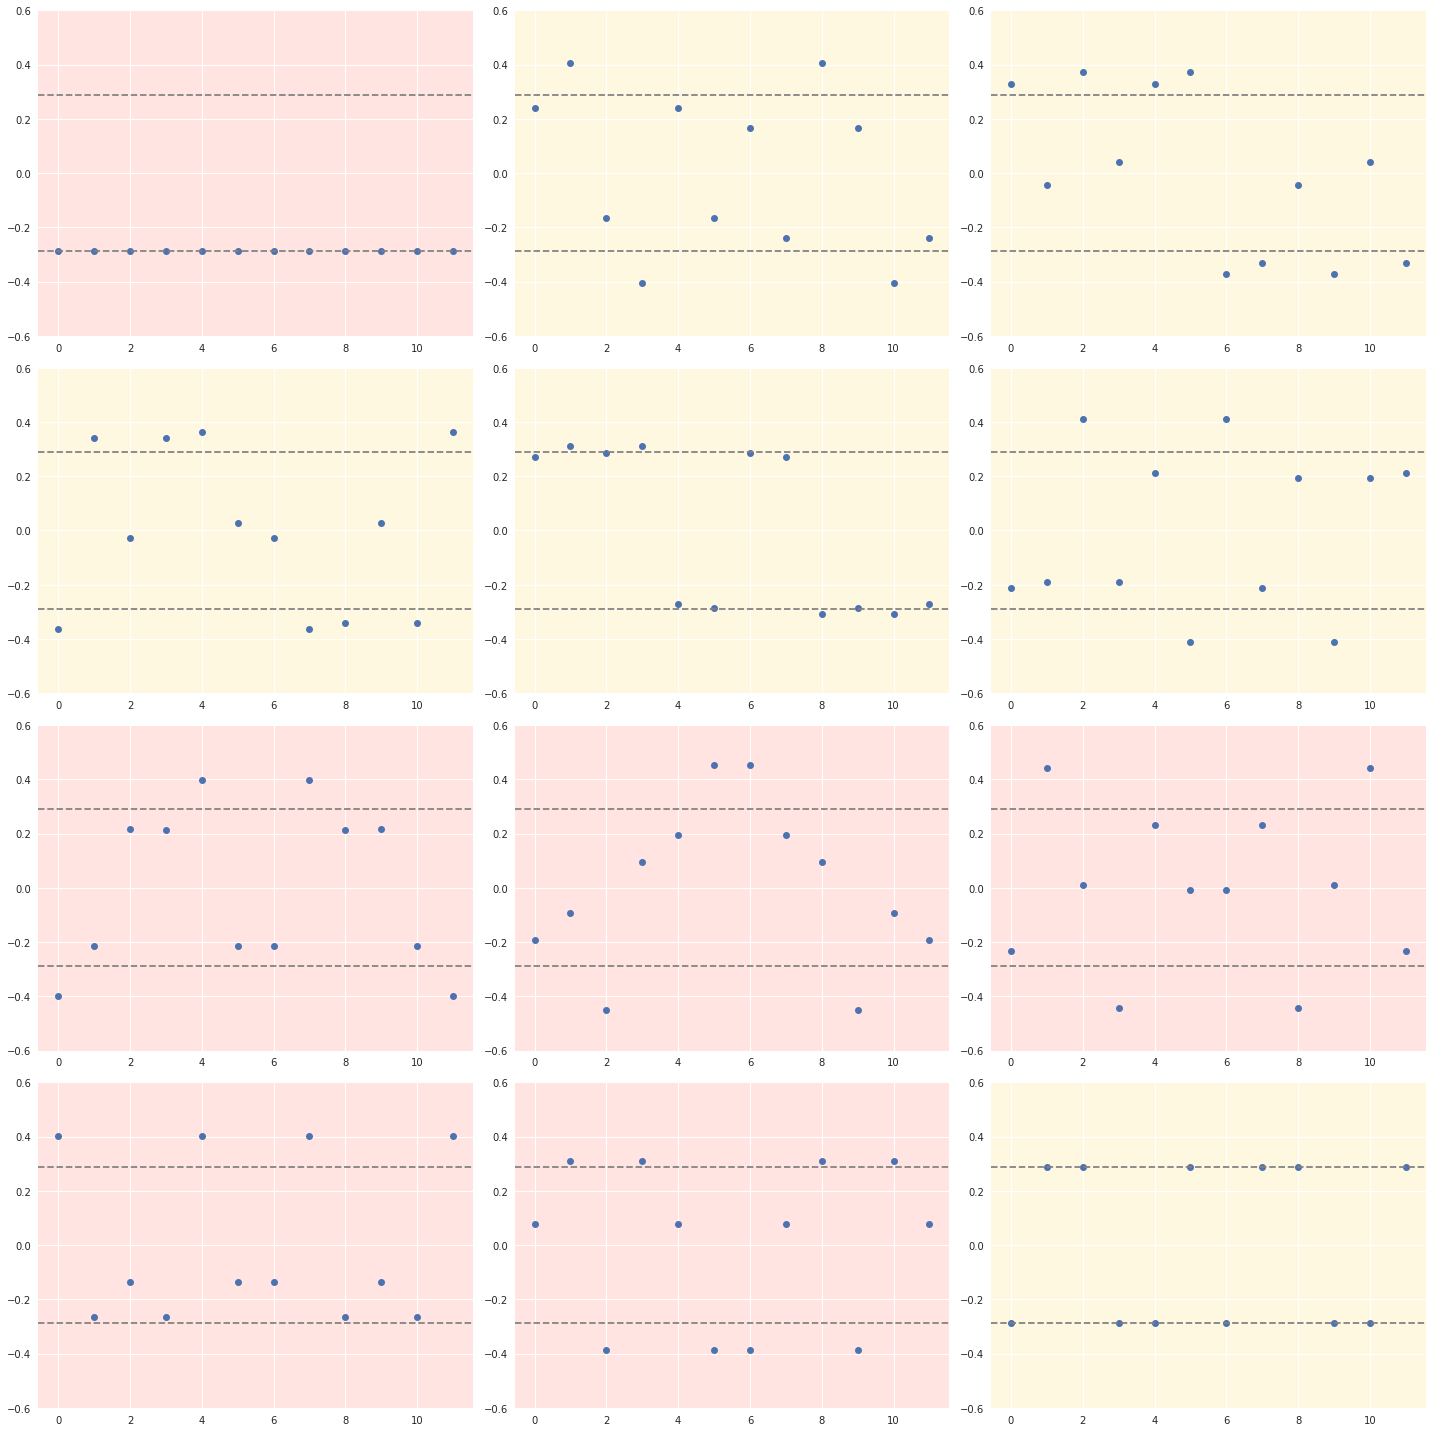

In [110]:
def get_squeezed_eigenstate(full_estate, threshold=1e-2):
    """ Takes in an eigenstate (as a 1D numpy-array) and returns
        the leading contributions, i.e., the ones larger in magnitude
        than the threshold.
        Also returns the appropriate indicies.
    """
    ses =  full_estate[np.abs(full_estate) >= threshold].flatten()
    i = np.argwhere(np.abs(full_estate) >= threshold)
    return ses, i
    


with plt.style.context('seaborn'):
    fig, ax = plt.subplots(4,3)
    fig.set_size_inches(20, 20)
    ax = ax.flatten()
    
    for i, estate in enumerate(range(12)):
        ses, _ = get_squeezed_eigenstate(eigenstates[:,estate], threshold=5*1e-3)
        print(len(ses))
        ax[i].plot(ses, ls='', marker='o')
        
        ax[i].axhline(np.sqrt(1/12), ls='--', color='gray', marker='')
        ax[i].axhline(-np.sqrt(1/12), ls='--', color='gray', marker='')
        
        # The lattices are organized such, that the reversing the order corresponds
        # to a charge conjugation, i.e., occupied links become unoccupied and vice versa.
        # (in the spin picture: all directions are flipped).
        # We can use this to check the parity under this transformation.
        
        atol = 1e-5
        if np.allclose(ses[::-1], ses, atol=atol):
            ax[i].set_facecolor((1.0, 0.47, 0.42, 0.2))
        elif np.allclose(ses[::-1], -ses, atol=atol):
            ax[i].set_facecolor((1.0, 0.87, 0.42, 0.2))
            
        ext = 0.6
        ax[i].set_ylim(-ext, ext)
    
#     ax[0,0].set_yscale('log')
#     ax[0,1].set_yscale('log')

threshold = 1e-2
print(np.argwhere(np.abs(eigenstates[:,estate]) >= threshold).T)
contributions = np.array(builder.lookup_table)[np.argwhere(np.abs(eigenstates[:,estate]) >= threshold).flatten()]
print(contributions)

fig.tight_layout()
fig.savefig('parity_states_lambda-100.pdf')

In [63]:
  
get_squeezed_eigenstate(eigenstates[:,0])

(array([-0.28865749, -0.28865749, -0.28865749, -0.28865749, -0.28865749,
        -0.28865749, -0.28865749, -0.28865749, -0.28865749, -0.28865749,
        -0.28865749, -0.28865749]),
 array([[1844],
        [1913],
        [3010],
        [3196],
        [4069],
        [4262],
        [5337],
        [5530],
        [6403],
        [6589],
        [7686],
        [7755]]))

0.28867513459481287

In [85]:
int('10001101', 2)

141

In [93]:
~141+256

114

In [89]:
2**8 - 141 - 1

114